<a href="https://www.kaggle.com/code/mohdusaid/implement-knn-by-hand-for-absolute-beginners?scriptVersionId=127186171" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt  
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising/Advertising.csv


In [2]:
# Read data
df_adv = pd.read_csv('/kaggle/input/advertising/Advertising.csv')
df_adv

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# In this notebook, we implement knn algorithm by hand in the simplest way possible. Main goal is to get some insight on knn working principle.
# In order to simplify things, we considered k=1 and subset the advertising dataset in an attempt to predict sales from TV budgets

In [4]:
# Get a subset of the data
data_x = df_adv.TV[5:13]
data_y = df_adv.sales[5:13]

In [5]:
data_x

5       8.7
6      57.5
7     120.2
8       8.6
9     199.8
10     66.1
11    214.7
12     23.8
Name: TV, dtype: float64

In [6]:
data_y

5      7.2
6     11.8
7     13.2
8      4.8
9     10.6
10     8.6
11    17.4
12     9.2
Name: sales, dtype: float64

In [7]:
# Sort the data
# We need to sort the data in order to apply the KNN algorithm.
idx = np.argsort(data_x).values # Get indices ordered from lowest to highest values
                                # sorted in ascending order

idx

array([3, 0, 7, 1, 5, 2, 4, 6])

In [8]:
# Get the actual data in the order from above
data_x  = data_x.iloc[idx]
data_y  = data_y.iloc[idx]

In [9]:
data_x

8       8.6
5       8.7
12     23.8
6      57.5
10     66.1
7     120.2
9     199.8
11    214.7
Name: TV, dtype: float64

In [10]:
data_y

8      4.8
5      7.2
12     9.2
6     11.8
10     8.6
7     13.2
9     10.6
11    17.4
Name: sales, dtype: float64

In [11]:
# function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  Note that this 
# is just for k = 1 and the distance function is simply the 
# absolute value.
def find_nearest(array,value):
    idx = (np.abs(array-value)).idxmin()
    return idx, array[idx]

In [12]:


# Create some artificial x-values (might not be in the actual dataset)
x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero
y = np.zeros( (len(x)))

In [13]:
# Apply the KNN algorithm.  Try to predict the y-value at a given x-value

for i, xi in enumerate(x):
    y[i] = data_y[find_nearest( data_x, xi )[0]]

Text(0, 0.5, 'Sales in $1000')

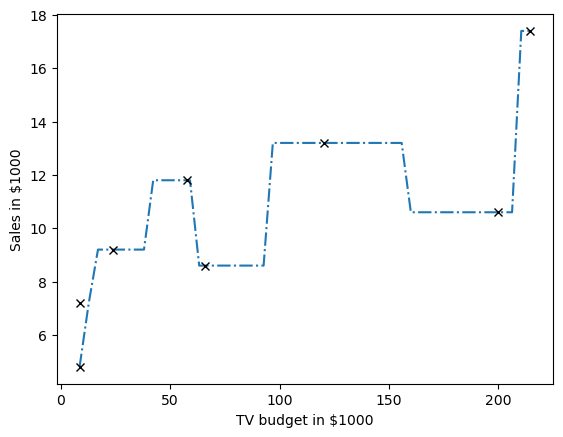

In [14]:
# Plot your solution    
plt.plot(x,y, '-.')
# Plot the original data using black x's.
plt.plot(df_adv.TV[5:13], df_adv.sales[5:13], 'kx')
plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

